In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns


In [16]:
df = pd.read_csv("f2.csv")
df.head()


,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


NameError: name 'plt' is not defined

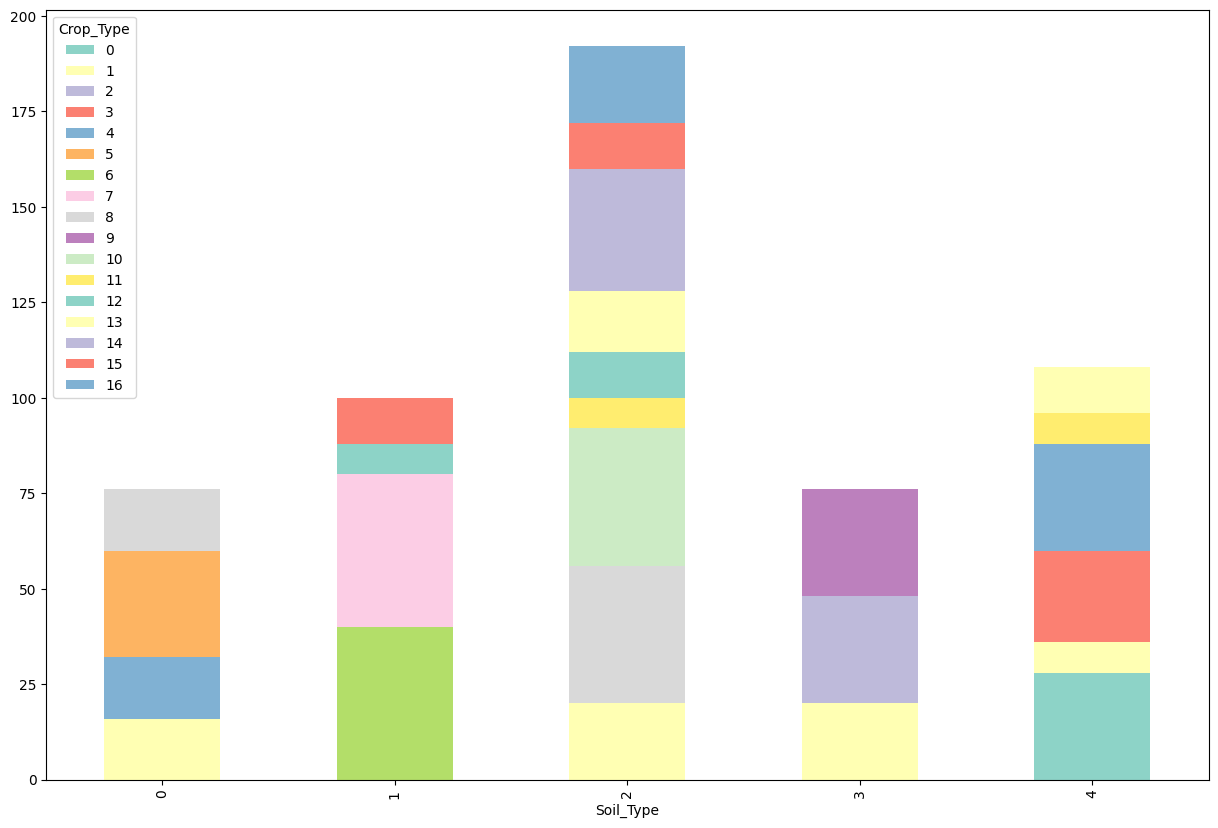

In [17]:
# Encode categorical variables
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fertilizer = LabelEncoder()

df['Soil_Type'] = le_soil.fit_transform(df['Soil_Type'])
df['Crop_Type'] = le_crop.fit_transform(df['Crop_Type'])
df['Fertilizer'] = le_fertilizer.fit_transform(df['Fertilizer'])

# Define features and target
X = df.drop('Fertilizer', axis=1)
y = df['Fertilizer']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

soil_crop_dist = pd.crosstab(df['Soil_Type'], df['Crop_Type'])
soil_crop_dist.plot(kind='bar', stacked=True, figsize=(15, 10), color=sns.color_palette("Set3"))
plt.title("Crop Type Distribution Across Different Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Count of Crops")
plt.xticks(rotation=45)
plt.show()


In [23]:
acuracies = {"Random Forest": 1.00,"Gradient Boosting": 0.9984269,"XGBoost": 0.9958014,
"Decision Tree": 0.9235167,"Naive Bayes": 0.9180435,"SVM": 0.9126951}

In [4]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc

accuracies


C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:43:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Random Forest': 1.0,
 'Gradient Boosting': 1.0,
 'XGBoost': 1.0,
 'Decision Tree': 1.0,
 'Naive Bayes': 0.9279279279279279,
 'SVM': 0.9009009009009009}

In [11]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),  # Controls overfitting
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, max_depth=2, learning_rate=0.1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42),  # Reduces variance
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', C=1.0, gamma=0.01)  # Regularized and limited complexity
}
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
accuracies

{'Random Forest': 1.0,
 'Gradient Boosting': 1.0,
 'XGBoost': 1.0,
 'Decision Tree': 1.0,
 'Naive Bayes': 0.9279279279279279,
 'SVM': 0.9009009009009009}

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load the dataset


digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the model with initial parameters
model = GradientBoostingClassifier()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(report)


KeyboardInterrupt: 

In [24]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),  # Controls overfitting
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, max_depth=2, learning_rate=0.1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42),  # Reduces variance
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', C=1.0, gamma=0.01)  # Regularized and limited complexity
}
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
print("Accuracies: ",acuracies)

Accuracies:  {'Random Forest': 1.0, 'Gradient Boosting': 0.9984269, 'XGBoost': 0.9958014, 'Decision Tree': 0.9235167, 'Naive Bayes': 0.9180435, 'SVM': 0.9126951}
